---
Train/Test-split
---


## Problem statement

As we've seen in the previous lecture, on way to evaluate a particular models fit to our training data is to calculate the a loss metric (either MAE, MSE or RMSE). We then say that the models with the smallest loss metrics to fit the data the best.

However, is this practically useful? As we'll se in this notebook, this is actually not the case. In fact, as we calculated the loss metric on our training data, but what we really want is for our model to behave well on **new, unseen** data. 

A well-working solution to this problem, as we'll see, is to split our data into two splits: a train- and a test split. Then we'll only use the train data to fit our model. The actualy evaluation will be done on the test data, which now simulates new, unseen data!

---

Importing needed libraries


In [73]:
import random

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Let's now define our loss-metrics. We'll use both MAE and MSE here.

In [74]:
def MAE(y_true, y_predictions):

    '''Calculates the Mean Absolute Error between true values y and predicted y_hat'''
    
    initial_sum = sum([np.abs(y-y_hat) for y, y_hat in zip(y_true, y_predictions)])

    mae = initial_sum/len(y_true)

    mae_rounded = round(mae, 4)

    return mae_rounded

def MSE(y_true, y_predictions):
    
    '''Calculates the Mean Squared Error between true values y and predicted y_hat'''
    
    initial_sum = sum([(y-y_hat)**2 for y, y_hat in zip(y_true, y_predictions)])

    mse = initial_sum/len(y_true)

    mse_rounded = round(mse, 4)

    return mse_rounded

Create and plot some dummy data for demonstrative purposes

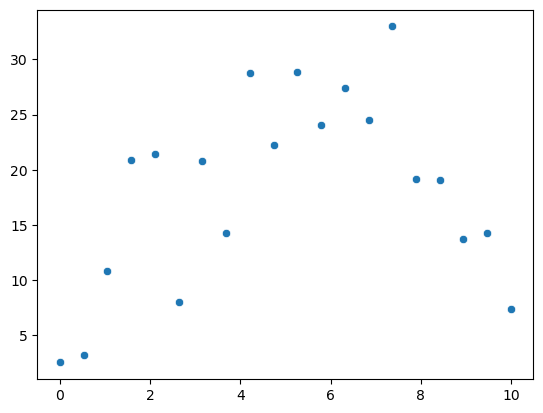

In [75]:
def f(x):

    y = -x**2 + 10*x

    return y

# Define the range of x values
x_vals = np.linspace(0, 10, 20)
y_vals = np.array([f(x) for x in x_vals])

# Now let's add some noise to our y_vals, to mimic more realistic data

noise_std = 6.0  # Adjust this value to control the amount of noise
noise = np.random.normal(0, noise_std, len(y_vals)) # Generate noise from a normal distribution with the same length as y_vals

# add the generated noise to our y_vals
y_vals = y_vals + noise

# plot the results
sns.scatterplot(x=x_vals, y=y_vals);

---

## Fitting models

Alright, now that we have dummy data. Let's do some quick regplots to see which degree polynomial naively fits best to this data 

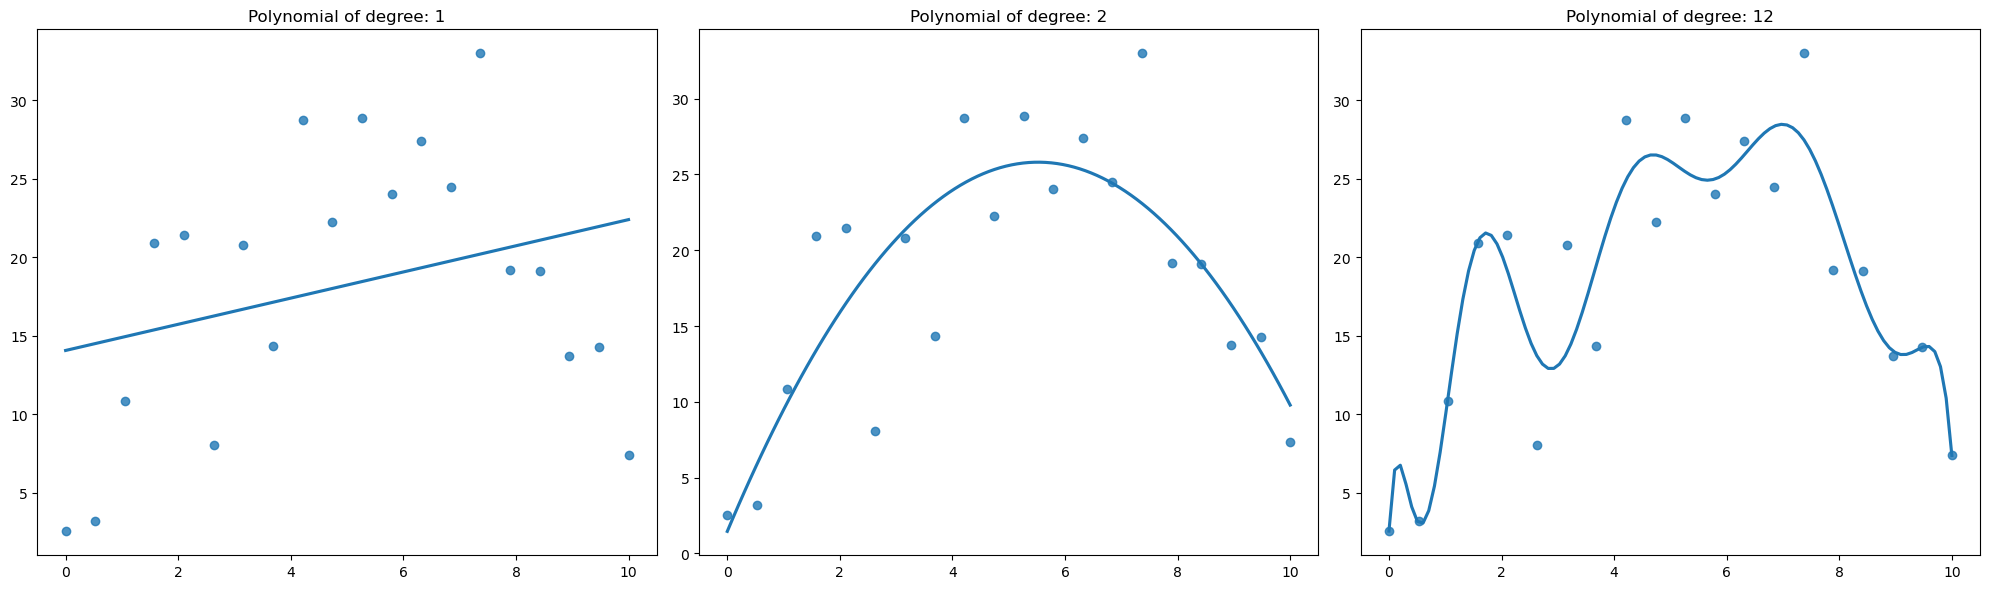

In [76]:
degrees = [1, 2, 12]

fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=100)  # Adjust figsize as needed
j = 0

for i, degree in enumerate(degrees):
    sns.regplot(x=x_vals, y=y_vals, order=degree, ax=ax[i], ci=None)
    ax[i].set_title(f"Polynomial of degree: {degree}")

fig.tight_layout()
plt.show()

**Conclusion**:

- The linear models doesn't seem to be a good model here
- The polynomial of degree 2 seems to do a much better job
- However, it looks as if the polynomial of degree 12 'fits' the data best, right? Since all $\hat{y}$ are perfect, or very close, estimates of $y$

---

## Naive loss-metric calculation

Let's confirm the conclusions above by calculating MAE and MSE for the models we've plotted. We've used polynomials of order 1,2 and 12. 

In other words, we've assumed that:

- For order 1:
$$ f_{w,b}(x) = w_1 \cdot x + b $$

- For order 2:
$$ f_{w,b}(x) = w_2 \cdot x^2 + w_1 \cdot x + b $$

- For order 12:
$$ f_{w,b}(x) = w_{12} \cdot x^{12} + w_{11} \cdot x^{11} + \ldots + w_{1} \cdot x + b $$

We'll start by **defining** the models above


In [77]:
def linear_model(x, w, b):    # a linear model is a polynomial of degree 1

    y_hat = w*x+b

    return y_hat

def polynomial_model_degree_2(x, w2, w1, b):

    y_hat = w2*x**2 + w1*x+b

    return y_hat

def polynomial_model_degree_12(x, w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b):
    
    y_hat = w12*x**12 + w11*x**11 + w10*x**10 + w9*x**9 +w8*x**8 + w7*x** 7 + w6*x**6 + w5*x**5 + w4*x**4 + w3*x**3 + w2*x**2 + w1*x + b
    
    return y_hat

Now, we can **polyfiting** in order to get the parameters. Thereafter, we'll **predict** the $\hat{y}$ of each model, and finally use them to **calculate** our loss metrics. 

In [78]:
# degree 1 (linear model)

w1, b = np.polyfit(x_vals, y_vals, deg=1)

y_hats_linear_model = np.array([linear_model(x, w1, b) for x in x_vals])

print('Polynomial of degree 1 (linear model):', end='\n\n')

linear_model_MAE = MAE(y_vals, y_hats_linear_model)
linear_model_MSE = MSE(y_vals, y_hats_linear_model)

print('MAE:', linear_model_MAE)
print('MSE:', linear_model_MSE)

Polynomial of degree 1 (linear model):

MAE: 7.1845
MSE: 65.5377


In [79]:
# degree 2 

w2, w1, b = np.polyfit(x_vals, y_vals, deg=2)

y_hats_polynomial_model_degree_2 = np.array([polynomial_model_degree_2(x, w2, w1, b) for x in x_vals])

print('Polynomial of degree 2:', end='\n\n')

polynomial_model_degree_2_MAE = MAE(y_vals, y_hats_polynomial_model_degree_2)
polynomial_model_degree_2_MSE = MSE(y_vals, y_hats_polynomial_model_degree_2)

print('MAE:', polynomial_model_degree_2_MAE)
print('MSE:', polynomial_model_degree_2_MSE)

Polynomial of degree 2:

MAE: 3.5041
MSE: 22.5937


In [80]:
# degree 12 

w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b = np.polyfit(x_vals, y_vals, deg=12)

y_hats_polynomial_model_degree_12 = np.array([polynomial_model_degree_12(x, w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b) for x in x_vals])

print('Polynomial of degree 12:', end='\n\n')

polynomial_model_degree_12_MAE = MAE(y_vals, y_hats_polynomial_model_degree_12)
polynomial_model_degree_12_MSE = MSE(y_vals, y_hats_polynomial_model_degree_12)

print('MAE:', polynomial_model_degree_12_MAE)
print('MSE:', polynomial_model_degree_12_MSE)

Polynomial of degree 12:

MAE: 2.4604
MSE: 11.0696


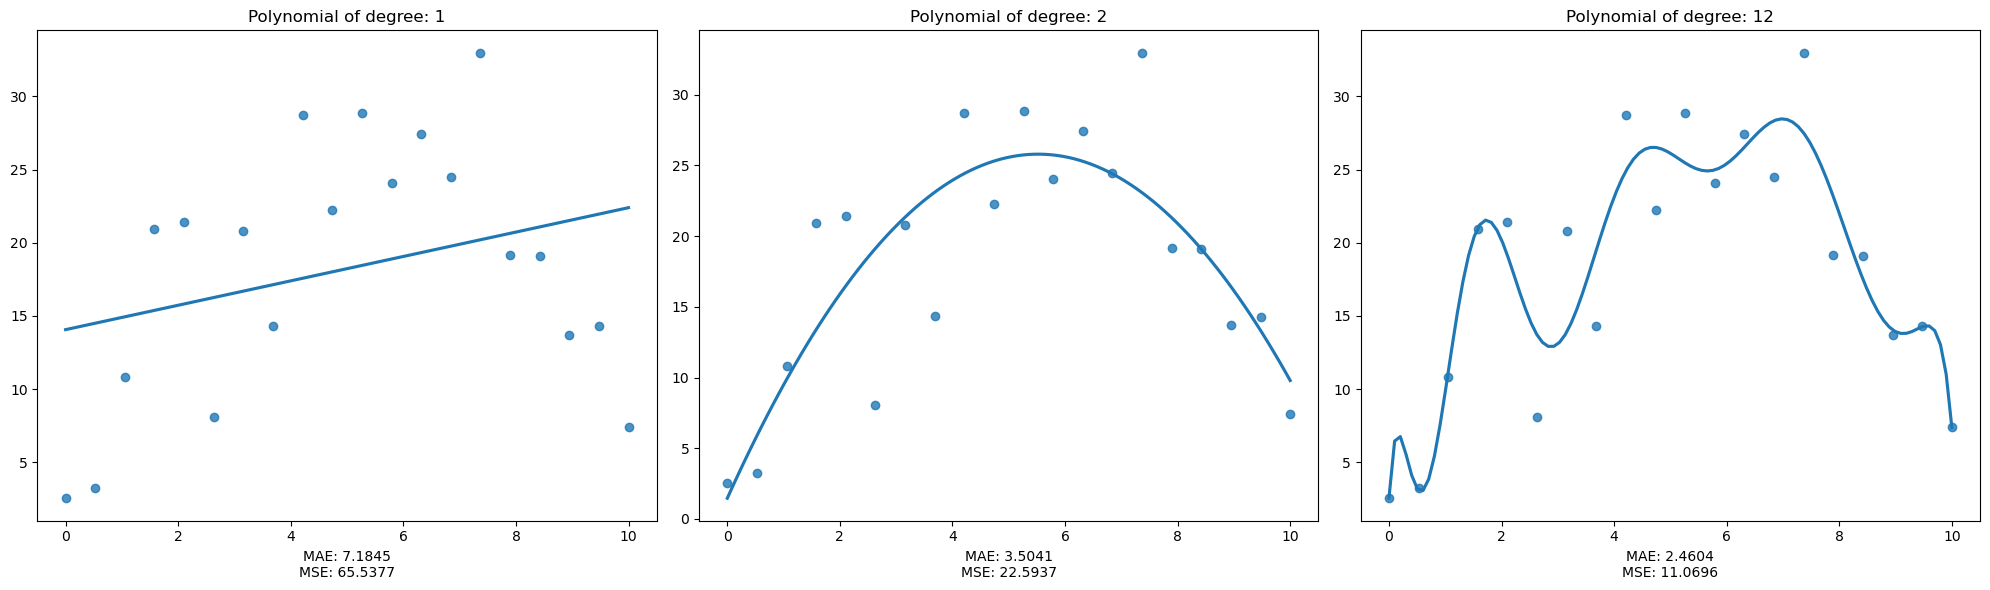

In [81]:
degrees = [1, 2, 12]
all_maes = [linear_model_MAE, polynomial_model_degree_2_MAE, polynomial_model_degree_12_MAE]
all_mses = [linear_model_MSE, polynomial_model_degree_2_MSE, polynomial_model_degree_12_MSE]


fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=100)  # Adjust figsize as needed
j = 0

for i, degree in enumerate(degrees):
    sns.regplot(x=x_vals, y=y_vals, order=degree, ax=ax[i], ci=None)
    ax[i].set_title(f"Polynomial of degree: {degree}")
    ax[i].set_xlabel(f"MAE: {all_maes[i]}\nMSE: {all_mses[i]}") 

fig.tight_layout()
plt.show()

---

## This aint good enough though! 

Why? Because what we really want is to estimate the models performance on unseen data - **not** on the data that we have trained on! 

We're really only interested in how the model will be valuable to us when used in production, and we can't get a realiable estimate on that simply by how well the model fits on the data it has been trained on.

In fact, as we'll see in the deep learning course, it is always possible to achieve a loss (e.g. MAE) of 0 on the data you've trained on.

*Thus, in order to to simulate performance on data the model has not been trained on*, we will split our total training data into two sets

1. a train set
2. a test set

The training set will be used exclusively to fit our model, while the testing set then will be what we calculate our loss on. If we get a good performance on the test set, we'll have good reasons to believe that the model is actually useful!

**Let's demonstrate the concept**

---

## Train/test split

It's very easy to split our data into a training- and testing set. Usually, we do a 80/20 random split.

However, do not that the ratio of splits can be very different depending on circumstances - but 80/20 is a good starting point.

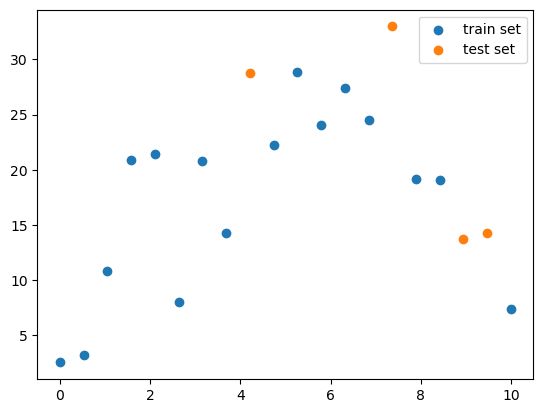

In [82]:
# We will use scikit-learn to split our data

# scikit-learn is a Python library with tons of useful functions and methods to train ml-models

from sklearn.model_selection import train_test_split

test_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=test_ratio)

# Visualize our splits

plt.scatter(x_train, y_train, label='train set')
plt.scatter(x_test, y_test, label='test set')

plt.legend()
plt.show()



Now let's fit our polynomials of degree 1, 2 and 12 using only data from the train set. Then, we'll evaluate our loss on both the train and the test set - the latter of which has not been seen on the test set

This process is all going to be easier using scikit-learn, but we do this explicitly now just to showcase the process.

To be clear, this is what we're going to do:

For each polynoimal degree of 1,2 and 12:

    1. Fit a model using only the training data
    2. Use that model to calculate y_hat for both the train and test data (the latter of which we havnt seen during training)
    3. Calculate MAE and MSE for both train and test data

In [83]:
# degree 1 (linear model)

w1, b = np.polyfit(x_train, y_train, deg=1)    # note that we fit only on the train set here

y_hats_train_linear_model = np.array([linear_model(x, w1, b) for x in x_train])   # predict y_hats for the train set
y_hats_test_linear_model = np.array([linear_model(x, w1, b) for x in x_test])     # predict y_hats for the test set

print('Polynomial of degree 1 (linear model):', end='\n\n')

linear_model_train_MAE = MAE(y_train, y_hats_train_linear_model)     # calculate MAE for train set
linear_model_train_MSE = MSE(y_train, y_hats_train_linear_model)     # calculate MSE for train set

linear_model_test_MAE = MAE(y_test, y_hats_test_linear_model)        # calculate MAE for test set
linear_model_test_MSE = MSE(y_test, y_hats_test_linear_model)        # calculate MSE for test set

print('MAE train:', linear_model_train_MAE)
print('MSE train:', linear_model_train_MSE, end='\n\n')

print('MAE train:', linear_model_test_MAE)
print('MSE train:', linear_model_test_MSE)

Polynomial of degree 1 (linear model):

MAE train: 6.4897
MSE train: 55.4914

MAE train: 10.3342
MSE train: 109.9992


In [84]:
# degree 2 

w2, w1, b = np.polyfit(x_train, y_train, deg=2)     # note that we fit only on the train set here

y_hats_train_polynomial_model_degree_2 = np.array([polynomial_model_degree_2(x, w2, w1, b) for x in x_train])  # predict y_hats for the train set
y_hats_test_polynomial_model_degree_2 = np.array([polynomial_model_degree_2(x, w2, w1, b) for x in x_test])    # predict y_hats for the test set

print('Polynomial of degree 2:', end='\n\n')

polynomial_model_train_degree_2_MAE = MAE(y_train, y_hats_train_polynomial_model_degree_2)            # calculate MAE for train set
polynomial_model_train_degree_2_MSE = MSE(y_train, y_hats_test_polynomial_model_degree_2)             # calculate MAE for test set

polynomial_model_test_degree_2_MAE = MAE(y_test, y_hats_test_polynomial_model_degree_2)               # calculate MSE for train set
polynomial_model_test_degree_2_MSE = MSE(y_test, y_hats_test_polynomial_model_degree_2)               # calculate MSE for test set

print('MAE:', polynomial_model_train_degree_2_MAE)
print('MSE:', polynomial_model_train_degree_2_MSE, end='\n\n')

print('MAE:', polynomial_model_test_degree_2_MAE)
print('MSE:', polynomial_model_test_degree_2_MSE)

Polynomial of degree 2:

MAE: 3.2149
MSE: 40.4241

MAE: 5.0691
MSE: 40.9123


In [85]:
# degree 12 
 

w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b = np.polyfit(x_train, y_train, deg=12)   # note that we fit only on the train set here

# predict y_hats for the train set
# predict y_hats for the test set

y_hats_train_polynomial_model_degree_12 = np.array([polynomial_model_degree_12(x, w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b) for x in x_train])
y_hats_test_polynomial_model_degree_12 = np.array([polynomial_model_degree_12(x, w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b) for x in x_test])

print('Polynomial of degree 12:', end='\n\n')

polynomial_model_train_degree_12_MAE = MAE(y_train, y_hats_train_polynomial_model_degree_12)            # calculate MAE for train set
polynomial_model_train_degree_12_MSE = MSE(y_train, y_hats_train_polynomial_model_degree_12)             # calculate MAE for test set

polynomial_model_test_degree_12_MAE = MAE(y_test, y_hats_test_polynomial_model_degree_12)               # calculate MSE for train set
polynomial_model_test_degree_12_MSE = MSE(y_test, y_hats_test_polynomial_model_degree_12)               # calculate MSE for test set

print('MAE:', polynomial_model_train_degree_12_MAE)
print('MSE:', polynomial_model_train_degree_12_MSE, end='\n\n')

print('MAE:', polynomial_model_test_degree_12_MAE)
print('MSE:', polynomial_model_test_degree_12_MSE)

Polynomial of degree 12:

MAE: 1.7748
MSE: 6.965

MAE: 213.0649
MSE: 117088.9174


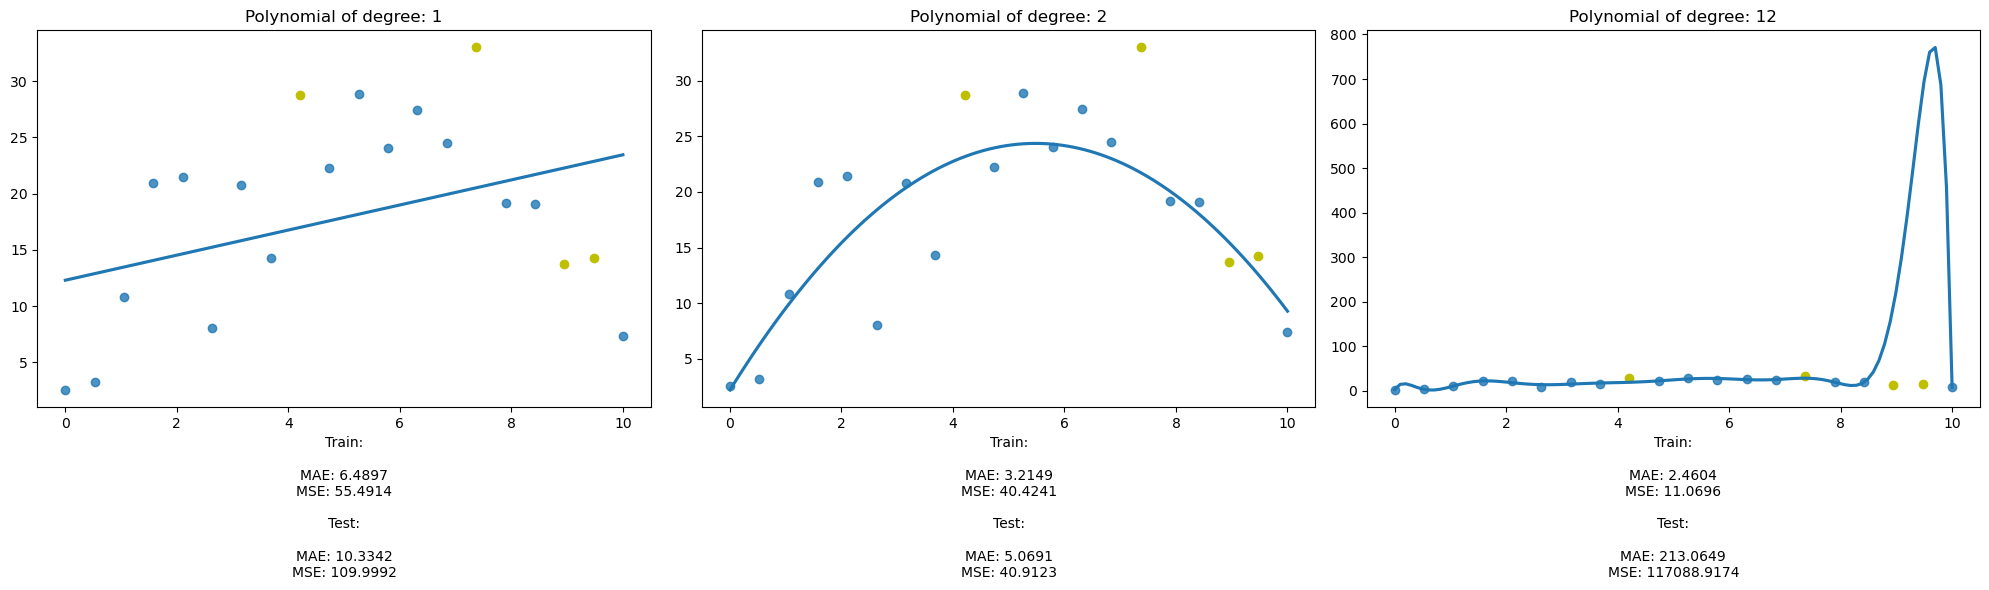

In [86]:
# plot the results so that we can see what we've done

degrees = [1, 2, 12]
all_train_maes = [linear_model_train_MAE, polynomial_model_train_degree_2_MAE, polynomial_model_degree_12_MAE]
all_train_mses = [linear_model_train_MSE, polynomial_model_train_degree_2_MSE, polynomial_model_degree_12_MSE]

all_test_maes = [linear_model_test_MAE, polynomial_model_test_degree_2_MAE, polynomial_model_test_degree_12_MAE]
all_test_mses = [linear_model_test_MSE, polynomial_model_test_degree_2_MSE, polynomial_model_test_degree_12_MSE]


fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=100) 

for i, degree in enumerate(degrees):
    sns.regplot(x=x_train, y=y_train, order=degree, ax=ax[i], ci=None)
    ax[i].scatter(x_test, y_test, color='y')
    ax[i].set_title(f"Polynomial of degree: {degree}")
    ax[i].set_xlabel(f"Train:\n\nMAE: {all_train_maes[i]}\nMSE: {all_train_mses[i]}\n\nTest:\n\nMAE: {all_test_maes[i]}\nMSE: {all_test_mses[i]}") 

fig.tight_layout()
plt.show()

---

# Conclusion

We've seen that a low loss on only the train set is **not** a good indicator of performance on unseen data - which is what we require for the model to be actually useful.

**Overfit**

As a model becomes more and more flexible, i.e, it's ability to fit training data increases - we risk ending up with a model that is *overfit*. An overfit model is characterised by very good performance on the train set, but severly lacking performance on the test set.

**Underfit**

A model that has too little flexibility in relation to the data we train it on, will usually have poor performance on both the train and test data. We then say that the model is underfit.

**Good fit**

A model that has just the right amount of flexilibity will generally achieve good performance on both the train and test data. The goal in ML is thus to fit models to our data with as test set loss as possible - since this entails the best performance on unseen data.